# 4998 Applied Deep Learning Project
## Detect Cancer Metastases on Pathology Images

Jing Qian (jq2282)

# STEP 2. Model Selection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
TARGET_SHAPE = 299
BATCH_SIZE = 32
EPOCHS = 50
ilevel = 3
train_dir = 'drive/My Drive/project-adl/strain_level%d'%ilevel
nclass=300

## 2.1. Transfer Learning with Inception V3

In [0]:
import tensorflow.keras
from tensorflow.keras.applications.inception_v3 import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [55]:
conv_base = InceptionV3(weights='imagenet',include_top=False, input_shape=(299,299,3))
datagen = ImageDataGenerator(rescale=1./255)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 2048)) # get from conv_base.summary()
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(TARGET_SHAPE, TARGET_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)       
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = labels_batch
        i += 1
        if i * BATCH_SIZE >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, nclass*2)
#print(train_labels)

FLATTENED_SHAPE = 8 * 8 * 2048
train_features = np.reshape(train_features, (nclass*2, FLATTENED_SHAPE))
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=FLATTENED_SHAPE))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features, train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split = 0.2,
                    shuffle=True)

Found 600 images belonging to 2 classes.
Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 4s 8ms/sample - loss: 2.5765 - acc: 0.8042 - val_loss: 0.9504 - val_acc: 0.9083
Epoch 2/50
480/480 [==============================] - 1s 2ms/sample - loss: 4.0011 - acc: 0.7417 - val_loss: 5.3142 - val_acc: 0.6667
Epoch 3/50
480/480 [==============================] - 1s 2ms/sample - loss: 3.9243 - acc: 0.7500 - val_loss: 0.6357 - val_acc: 0.9500
Epoch 4/50
480/480 [==============================] - 1s 2ms/sample - loss: 1.7343 - acc: 0.8917 - val_loss: 1.7427 - val_acc: 0.8917
Epoch 5/50
480/480 [==============================] - 1s 2ms/sample - loss: 1.9274 - acc: 0.8792 - val_loss: 0.5717 - val_acc: 0.9583
Epoch 6/50
480/480 [==============================] - 1s 2ms/sample - loss: 2.1984 - acc: 0.8542 - val_loss: 0.6643 - val_acc: 0.9583
Epoch 7/50
480/480 [==============================] - 1s 2ms/sample - loss: 1.7306 - acc: 0.8875 - val_loss: 

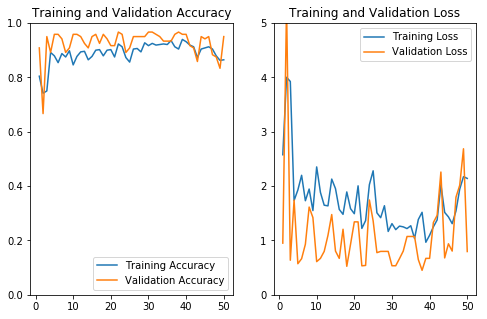

In [57]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylim(0,5)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 2.2. Inception V3 with Random Initialization

In [0]:
conv_base_RI = InceptionV3(weights=None,include_top=False, input_shape=(299,299,3))
datagen = ImageDataGenerator(rescale=1./255)

def extract_features_RI(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 2048)) # get from conv_base.summary()
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(TARGET_SHAPE, TARGET_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base_RI.predict(inputs_batch)       
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = labels_batch
        i += 1
        if i * BATCH_SIZE >= sample_count:
            break
    return features, labels

train_features_RI, train_labels = extract_features_RI(train_dir, nclass*2)
#print(train_labels)

FLATTENED_SHAPE = 8 * 8 * 2048
train_features_RI = np.reshape(train_features_RI, (nclass*2, FLATTENED_SHAPE))
model_RI = Sequential()
model_RI.add(Dense(256, activation='relu', input_dim=FLATTENED_SHAPE))
model_RI.add(Dropout(0.5))
model_RI.add(Dense(1, activation='sigmoid'))

model_RI.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_RI = model_RI.fit(train_features_RI, train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split = 0.2,
                    shuffle=True)

Found 600 images belonging to 2 classes.
Train on 480 samples, validate on 120 samples
Epoch 1/50
480/480 [==============================] - 9s 18ms/sample - loss: 0.6929 - acc: 0.5188 - val_loss: 0.6799 - val_acc: 0.7167
Epoch 2/50
480/480 [==============================] - 7s 15ms/sample - loss: 0.6723 - acc: 0.5750 - val_loss: 0.6664 - val_acc: 0.7917
Epoch 3/50
480/480 [==============================] - 7s 16ms/sample - loss: 0.6725 - acc: 0.6042 - val_loss: 0.6531 - val_acc: 0.7750
Epoch 4/50
480/480 [==============================] - 8s 16ms/sample - loss: 0.6428 - acc: 0.6938 - val_loss: 0.6383 - val_acc: 0.7833
Epoch 5/50
480/480 [==============================] - 7s 16ms/sample - loss: 0.6327 - acc: 0.6896 - val_loss: 0.6238 - val_acc: 0.6833
Epoch 6/50
480/480 [==============================] - 7s 15ms/sample - loss: 0.6085 - acc: 0.6958 - val_loss: 0.6085 - val_acc: 0.7750
Epoch 7/50
480/480 [==============================] - 7s 15ms/sample - loss: 0.5934 - acc: 0.7396 - val

## 2.3. Inception V3 with Fine Tuning

In [50]:
import tensorflow.keras
from tensorflow.keras.applications.inception_v3 import *
conv_base_2 = InceptionV3(weights='imagenet',include_top=False, input_shape=(299,299,3))

model2 = Sequential()
model2.add(conv_base_2)
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

conv_base_2.trainable = False
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
            train_dir,
            target_size=(TARGET_SHAPE, TARGET_SHAPE),
            batch_size=BATCH_SIZE,
            class_mode='binary')

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit_generator(
      generator,
      steps_per_epoch=int(np.ceil(600*0.8 / float(BATCH_SIZE))),
      epochs=EPOCHS,
      shuffle=True
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               67109376  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 88,912,673
Trainable params: 88,878,241
Non-trainable params: 34,432
_________________________________________________________________
Found 600 images belonging to 2 classes.
Epoch 1/50
19/19 [==============================] - 6s 338ms/step - loss: 5.9127 - a

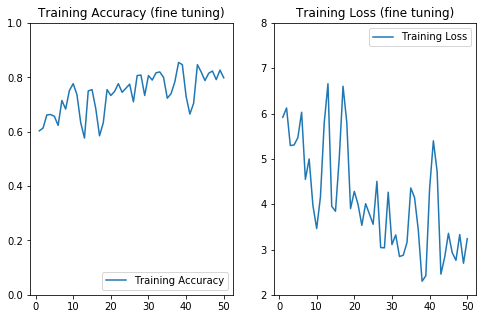

In [52]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt
acc = history2.history['acc']
loss = history2.history['loss']

epochs_range = range(1, EPOCHS + 1)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.title('Training Accuracy (fine tuning)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.ylim(2,8)
plt.legend(loc='upper right')
plt.title('Training Loss (fine tuning)')
plt.show()

In [0]:
model2.save('drive/My Drive/project-adl/model2_fineTuning.h5')
#del model  # deletes the existing model

#import tensorflow as tf 
#tmp = tf.keras.models.load_model('drive/My Drive/project-adl/model2_fineTuning.h5')

## 2.3 Multi-Scale Model

In [0]:
train3_dir = 'drive/My Drive/project-adl/strain_level3'
train4_dir = 'drive/My Drive/project-adl/strain_level4'

In [6]:
conv_base = InceptionV3(weights='imagenet',include_top=False, input_shape=(299,299,3))
#conv_base.summary()
datagen = ImageDataGenerator(rescale=1./255)

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8, 8, 2048)) # get from conv_base.summary()
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(TARGET_SHAPE, TARGET_SHAPE),
        batch_size=BATCH_SIZE,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)       
        features[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = features_batch
        labels[i * BATCH_SIZE : (i + 1) * BATCH_SIZE] = labels_batch
        i += 1
        if i * BATCH_SIZE >= sample_count:
            break
    return features, labels

train3_features, train3_labels = extract_features(train3_dir, nclass*2)
train4_features, _ = extract_features(train4_dir, nclass*2)
import keras
FLATTENED_SHAPE = 8 * 8 * 2048
train3_features = np.reshape(train3_features, (nclass*2, FLATTENED_SHAPE))
train4_features = np.reshape(train4_features, (nclass*2, FLATTENED_SHAPE))
merged_features = np.hstack((train3_features, train4_features))
print(np.shape(merged_features))

model34_trans = Sequential()
model34_trans.add(Dense(256, activation='relu', input_dim=FLATTENED_SHAPE*2))
model34_trans.add(Dropout(0.5))
model34_trans.add(Dense(1, activation='sigmoid'))

model34_trans.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history34_trans = model34_trans.fit(merged_features, train3_labels,
                                    epochs=EPOCHS,
                                    batch_size=BATCH_SIZE,
                                    validation_split = 0.2,
                                    shuffle=True)

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


Using TensorFlow backend.


(600, 262144)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 480 samples, validate on 120 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
480/480 [==============================] - 3s 7ms/sample - loss: 7.7823 - acc: 0.4854 - val_loss: 7.7904 - val_acc: 0.5167
Epoch 2/50
480/480 [==============================] - 2s 4ms/sample - loss: 8.0926 - acc: 0.4979 - val_loss: 7.7904 - val_acc: 0.5167
Epoch 3/50
480/480 [==============================] - 2s 4ms/sample - loss: 8.0926 - acc: 0.4979 - val_loss: 7.7904 - val_acc: 0.5167
Epoch 4/50
480/480 [==============================] - 2s 4ms/sample - loss: 8.1262 - acc: 0.4958 - val_loss: 7.7904 - val_acc: 0.5167
Epoch 5/50
480/480 [==============================] - 2s 4ms/sample - loss: 8.0926 - acc: 0.4979 - val_loss: 7.7904 - val_acc: 0.5167
Epoch 6/50
480/480 [==============================] - 2s 4ms/sample - loss: 7.7476 - acc: 0.5188 - val_loss

## 2.4 Self-Defined CNN

In [0]:
import numpy as np
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_data_gen = datagen.flow_from_directory(batch_size=BATCH_SIZE, 
                                                     directory=train_dir, 
                                                     shuffle=True, # Best practice: shuffle the training data
                                                     target_size=(299, 299),
                                                     class_mode='binary')

model0 = Sequential()
model0.add(Conv2D(32, (3, 3), activation='relu', input_shape=(299,299,3)))
model0.add(MaxPooling2D((2, 2)))
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D((2, 2)))
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(Flatten())
model0.add(Dense(512, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))

model0.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history0 = model0.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(600*0.8 / float(32))),
    epochs=10,
    shuffle=True
)

Found 600 images belonging to 2 classes.
Epoch 1/10
19/19 [==============================] - 177s 9s/step - loss: 7.6224 - acc: 0.4950
Epoch 2/10
19/19 [==============================] - 176s 9s/step - loss: 8.0210 - acc: 0.5000
Epoch 3/10
19/19 [==============================] - 174s 9s/step - loss: 7.9712 - acc: 0.5000
Epoch 4/10
19/19 [==============================] - 174s 9s/step - loss: 7.9878 - acc: 0.5000
Epoch 5/10
19/19 [==============================] - 173s 9s/step - loss: 7.9878 - acc: 0.5000
Epoch 6/10
19/19 [==============================] - 175s 9s/step - loss: 7.9629 - acc: 0.5000
Epoch 7/10
19/19 [==============================] - 174s 9s/step - loss: 7.9463 - acc: 0.5000
Epoch 8/10
19/19 [==============================] - 174s 9s/step - loss: 8.0127 - acc: 0.5000
Epoch 9/10
19/19 [==============================] - 174s 9s/step - loss: 7.9961 - acc: 0.5000
Epoch 10/10
19/19 [==============================] - 173s 9s/step - loss: 7.9463 - acc: 0.5000


# STEP 3. Performance of Selected Models

## 3.0. Load Test Slide

In [8]:
# Install the OpenSlide C library and Python bindings
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 2s (54.7 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 130824 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os
from PIL import Image
from skimage.color import rgb2gray

In [0]:
ilevel = 3
slide_id = '110'

In [0]:
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

In [12]:
total_path = '/content/drive/My Drive/project-adl'
slide_path = os.path.join(total_path,'slides/tumor_%s.tif' %slide_id)
tumor_mask_path = os.path.join(total_path,'slides/tumor_%s_mask.tif' %slide_id)

slide = open_slide(slide_path)
print ("Read WSI from %s with width: %d, height: %d" % (slide_path, 
                                                        slide.level_dimensions[0][0], 
                                                        slide.level_dimensions[0][1]))

tumor_mask = open_slide(tumor_mask_path)
print ("Read tumor mask from %s" % (tumor_mask_path))

print("Slide includes %d levels", len(slide.level_dimensions))
for i in range(len(slide.level_dimensions)):
    print("Level %d, dimensions: %s downsample factor %d" % (i, 
                                                             slide.level_dimensions[i], 
                                                             slide.level_downsamples[i]))
    if i < 8:
      assert tumor_mask.level_dimensions[i][0] == slide.level_dimensions[i][0]
      assert tumor_mask.level_dimensions[i][1] == slide.level_dimensions[i][1]

# Verify downsampling works as expected
width, height = slide.level_dimensions[7]
assert width * slide.level_downsamples[7] == slide.level_dimensions[0][0]
assert height * slide.level_downsamples[7] == slide.level_dimensions[0][1]

Read WSI from /content/drive/My Drive/project-adl/slides/tumor_110.tif with width: 94208, height: 71680
Read tumor mask from /content/drive/My Drive/project-adl/slides/tumor_110_mask.tif
Slide includes %d levels 9
Level 0, dimensions: (94208, 71680) downsample factor 1
Level 1, dimensions: (47104, 35840) downsample factor 2
Level 2, dimensions: (23552, 17920) downsample factor 4
Level 3, dimensions: (11776, 8960) downsample factor 8
Level 4, dimensions: (5888, 4480) downsample factor 16
Level 5, dimensions: (2944, 2240) downsample factor 32
Level 6, dimensions: (1472, 1120) downsample factor 64
Level 7, dimensions: (736, 560) downsample factor 128
Level 8, dimensions: (368, 280) downsample factor 256


In [13]:
input_size = 299
tumor_check_size = 128
bound = (input_size - 1)/2

down_factor = dict()
for i in range(8):
  down_factor[i] = 2**i
print(down_factor)

{0: 1, 1: 2, 2: 4, 3: 8, 4: 16, 5: 32, 6: 64, 7: 128}


## 3.1. Performance of Model 2.1.

### 3.1.1. Heatmap from Model 2.1

sensitivity and specificity

FPR = FP/(FP+TN)
TPR = TP/(TP+FN)

In [0]:
stride = 128
bound = 149 # (299-1)//2
width = slide.level_dimensions[ilevel][0]
height = slide.level_dimensions[ilevel][1]
nx = (int(width*0.9)-int(width*0.1))//stride + 1
ny = (int(height*0.9)-int(height*0.1))//stride + 1
pred = np.zeros((ny, nx))
test_label = np.zeros((ny, nx))
for i in range(nx):
  for j in range(ny):
    print(i,j)
    patch_ij = read_slide(slide,
                          x = int(0.1*width+stride*i-bound)*down_factor[ilevel],
                          y = int(0.1*height+stride*j-bound)*down_factor[ilevel],
                          level = ilevel,
                          width = input_size,
                          height = input_size)
    patch_ij = (patch_ij/255.).reshape(-1,299,299,3)
    features_ij = conv_base.predict(patch_ij)
    features_ij = np.reshape(features_ij,(1, FLATTENED_SHAPE))
    pred[j][i] = model.predict(features_ij)[:]
    #print(i,j, model.predict(features_ij)[:], model.predict_proba(features_ij)[:])

In [0]:
for i in range(nx):
  for j in range(ny):
    center = read_slide(tumor_mask,
                         x = int(0.1*width+stride*i-63)*down_factor[ilevel], 
                         y = int(0.1*height+stride*j-63)*down_factor[ilevel],
                         level = ilevel,
                         width = tumor_check_size,
                         height = tumor_check_size)[:,:,0]
    ilabel = 0
    if np.any(center) == 1: ilabel = 1
    test_label[j][i] = ilabel

In [0]:
np.savetxt('drive/My Drive/project-adl/pred_slide110.txt', pred)

Text(0.5, 1.0, 'tumor mask')

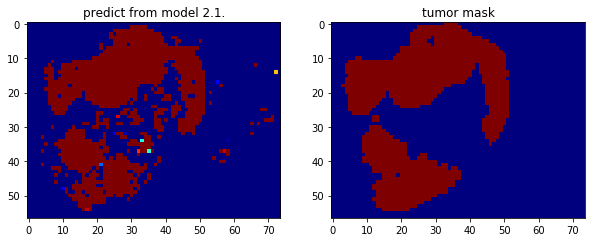

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(pred, cmap='jet')
plt.title('predict from model 2.1.')
plt.subplot(1,2,2)
plt.imshow(test_label, cmap='jet')
plt.title('tumor mask')

In [0]:
# Resize the prediction mask to fit on lev 7
width=int(slide.level_dimensions[7][0]*0.8)
height=int(slide.level_dimensions[7][1]*0.8)
pred_resize = np.zeros((height, width)) 
for i in range(nx):
  for j in range(ny):
    for l in range(8):
      tmpx = i*8+l
      if tmpx >= width: break
      for k in range(8):
        tmpy = j*8+k
        if tmpy>=height: break
        pred_resize[tmpy][tmpx]=pred[j][i]

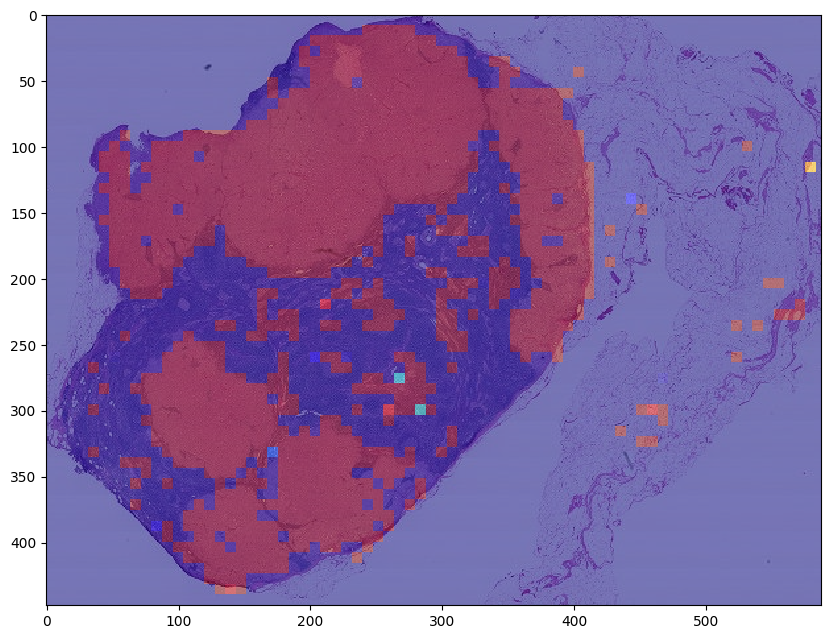

In [69]:
fig = plt.figure(figsize=(10,10), dpi=100)
tmp = plt.imshow(slide_image)
plt.imshow(pred_resize, cmap='jet', alpha=0.5) 
plt.savefig('drive/My Drive/project-adl/pred-model1-slide110.png')

### 3.1.2. ROC from Model 2.1.

Text(0.5, 1.0, 'ROC Curve on slide 110')

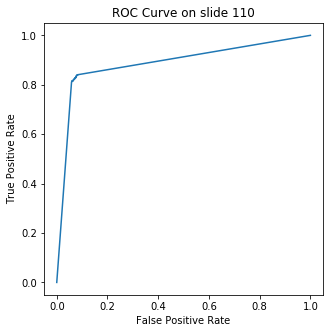

In [84]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve( test_label.flatten(),pred.flatten())
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on slide 110')

In [63]:
metrics.roc_auc_score(test_label.flatten(),pred.flatten())

0.8880125319521363

In [83]:
print(np.count_nonzero(test_label)/(nx*ny))

0.09376172959987988


### 3.1.3 Recall-Precision Curve from Model 2.1

Text(0.5, 1.0, 'Model performance on slide 110')

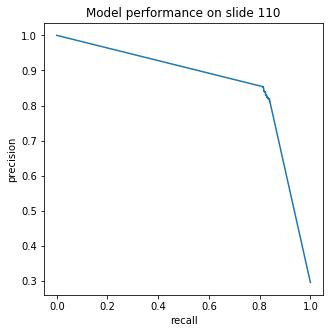

In [79]:
precision, recall, thresholds = metrics.precision_recall_curve(test_label.flatten(),pred.flatten())
plt.figure(figsize=(5,5))
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Recall-Precision Curve on slide 110')

### 3.1.4. Try a Different Test Slide

In [72]:
slide_id = '016'
total_path = '/content/drive/My Drive/project-adl'
slide_path = os.path.join(total_path,'slides/tumor_%s.tif' %slide_id)
tumor_mask_path = os.path.join(total_path,'slides/tumor_%s_mask.tif' %slide_id)

slide = open_slide(slide_path)
print ("Read WSI from %s with width: %d, height: %d" % (slide_path, 
                                                        slide.level_dimensions[0][0], 
                                                        slide.level_dimensions[0][1]))

tumor_mask = open_slide(tumor_mask_path)
print ("Read tumor mask from %s" % (tumor_mask_path))

print("Slide includes %d levels", len(slide.level_dimensions))
for i in range(len(slide.level_dimensions)):
    print("Level %d, dimensions: %s downsample factor %d" % (i, 
                                                             slide.level_dimensions[i], 
                                                             slide.level_downsamples[i]))
    if i < 8:
      assert tumor_mask.level_dimensions[i][0] == slide.level_dimensions[i][0]
      assert tumor_mask.level_dimensions[i][1] == slide.level_dimensions[i][1]

# Verify downsampling works as expected
width, height = slide.level_dimensions[7]
assert width * slide.level_downsamples[7] == slide.level_dimensions[0][0]
assert height * slide.level_downsamples[7] == slide.level_dimensions[0][1]

Read WSI from /content/drive/My Drive/project-adl/slides/tumor_016.tif with width: 97792, height: 221184
Read tumor mask from /content/drive/My Drive/project-adl/slides/tumor_016_mask.tif
Slide includes %d levels 10
Level 0, dimensions: (97792, 221184) downsample factor 1
Level 1, dimensions: (48896, 110592) downsample factor 2
Level 2, dimensions: (24448, 55296) downsample factor 4
Level 3, dimensions: (12224, 27648) downsample factor 8
Level 4, dimensions: (6112, 13824) downsample factor 16
Level 5, dimensions: (3056, 6912) downsample factor 32
Level 6, dimensions: (1528, 3456) downsample factor 64
Level 7, dimensions: (764, 1728) downsample factor 128
Level 8, dimensions: (382, 864) downsample factor 256
Level 9, dimensions: (191, 432) downsample factor 512


In [0]:
stride = 128
bound = 149 # (299-1)//2
width = slide.level_dimensions[ilevel][0]
height = slide.level_dimensions[ilevel][1]
nx = (int(width*0.9)-int(width*0.1))//stride + 1
ny = (int(height*0.9)-int(height*0.1))//stride + 1
pred16 = np.zeros((ny, nx))
test_label16 = np.zeros((ny, nx))
for i in range(nx):
  for j in range(ny):
    print(i,j)
    patch_ij = read_slide(slide,
                          x = int(0.1*width+stride*i-bound)*down_factor[ilevel],
                          y = int(0.1*height+stride*j-bound)*down_factor[ilevel],
                          level = ilevel,
                          width = input_size,
                          height = input_size)
    patch_ij = (patch_ij/255.).reshape(-1,299,299,3)
    features_ij = conv_base.predict(patch_ij)
    features_ij = np.reshape(features_ij,(1, FLATTENED_SHAPE))
    pred16[j][i] = model.predict(features_ij)[:]
    #print(i,j, model.predict(features_ij)[:], model.predict_proba(features_ij)[:])
    
    center = read_slide(tumor_mask,
                         x = int(0.1*width+stride*i-63)*down_factor[ilevel], 
                         y = int(0.1*height+stride*j-63)*down_factor[ilevel],
                         level = ilevel,
                         width = tumor_check_size,
                         height = tumor_check_size)[:,:,0]
    ilabel = 0
    if np.any(center) == 1: ilabel = 1
    test_label16[j][i] = ilabel

Text(0.5, 1.0, 'tumor mask')

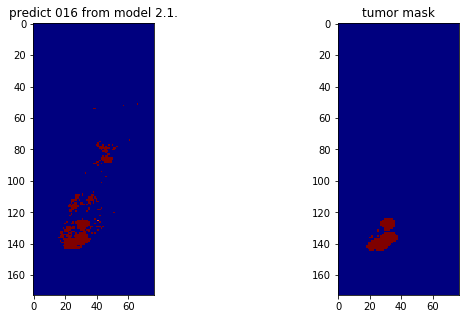

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(pred16, cmap='jet')
plt.title('predict 016 from model 2.1.')
plt.subplot(1,2,2)
plt.imshow(test_label16, cmap='jet')
plt.title('tumor mask')

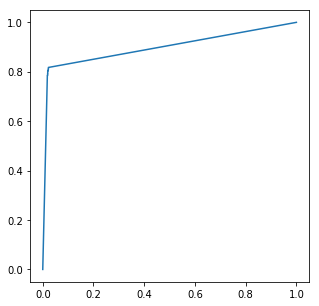

In [75]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_label16.flatten(),pred16.flatten())
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)

In [76]:
metrics.roc_auc_score(test_label16.flatten(),pred16.flatten())

0.8989291232693666

Text(0.5, 1.0, 'Model performance on slide 016')

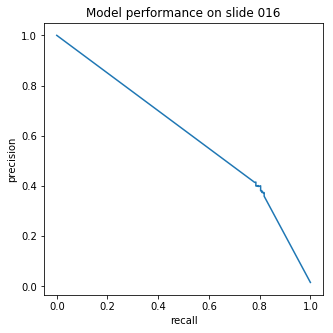

In [78]:
precision, recall, thresholds = metrics.precision_recall_curve(test_label16.flatten(),pred16.flatten())
plt.figure(figsize=(5,5))
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Model performance on slide 016')

## 3.2. Performance of Multi-Scale Model

### 3.2.1 Heapmap from Multi-Scale Model



In [0]:
ilevel = 3
jlevel = 4
stride = 128
bound = 149 # (299-1)//2
width = slide.level_dimensions[ilevel][0]
height = slide.level_dimensions[ilevel][1]
nx = (int(width*0.9)-int(width*0.1))//stride + 1
ny = (int(height*0.9)-int(height*0.1))//stride + 1
pred_34 = np.zeros((ny, nx))
test_label = np.zeros((ny, nx))
for i in range(nx):
  for j in range(ny):
    print(i,j)
    patch_ilev = read_slide(slide,
                      x = int(0.1*width+stride*i-bound)*down_factor[ilevel],
                      y = int(0.1*height+stride*j-bound)*down_factor[ilevel],
                      level = ilevel,
                      width = input_size,
                      height = input_size)
    patch_jlev = read_slide(slide,
                      x = int(0.1*width+stride*i)*down_factor[ilevel]-bound*down_factor[jlevel],
                      y = int(0.1*height+stride*j)*down_factor[ilevel]-bound*down_factor[jlevel],
                      level = jlevel,
                      width = input_size,
                      height = input_size)
    
    patch_ilev = (patch_ilev/255.).reshape(-1,299,299,3)
    patch_jlev = (patch_jlev/255.).reshape(-1,299,299,3)
    features_ilev = conv_base.predict(patch_ilev)
    features_jlev = conv_base.predict(patch_jlev)
    features_ilev = np.reshape(features_ilev,(1, FLATTENED_SHAPE))
    features_jlev = np.reshape(features_jlev,(1, FLATTENED_SHAPE))
    features_ij = np.hstack((features_ilev, features_jlev))
    pred_34[j][i] = model34_trans.predict(features_ij)[:]

In [0]:
np.savetxt('drive/My Drive/project-adl/pred_34_slide110.txt', pred_34)
# tmp=np.loadtxt('drive/My Drive/project-adl/pred_34_slide110.txt')
# plt.imshow(tmp)

Text(0.5, 1.0, 'tumor mask')

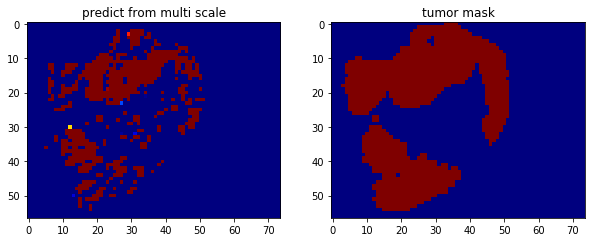

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(pred_34, cmap='jet')
plt.title('predict from multi scale')
plt.subplot(1,2,2)
plt.imshow(test_label, cmap='jet')
plt.title('tumor mask')

In [0]:
# Resize the prediction mask to fit on lev 7
width=int(slide.level_dimensions[7][0]*0.8)
height=int(slide.level_dimensions[7][1]*0.8)
pred34_resize = np.zeros((height, width)) 
for i in range(nx):
  for j in range(ny):
    for l in range(8):
      tmpx = i*8+l
      if tmpx >= width: break
      for k in range(8):
        tmpy = j*8+k
        if tmpy>=height: break
        pred34_resize[tmpy][tmpx]=pred_34[j][i]

Read WSI from /content/drive/My Drive/project-adl/slides/tumor_110.tif includes 9 levels


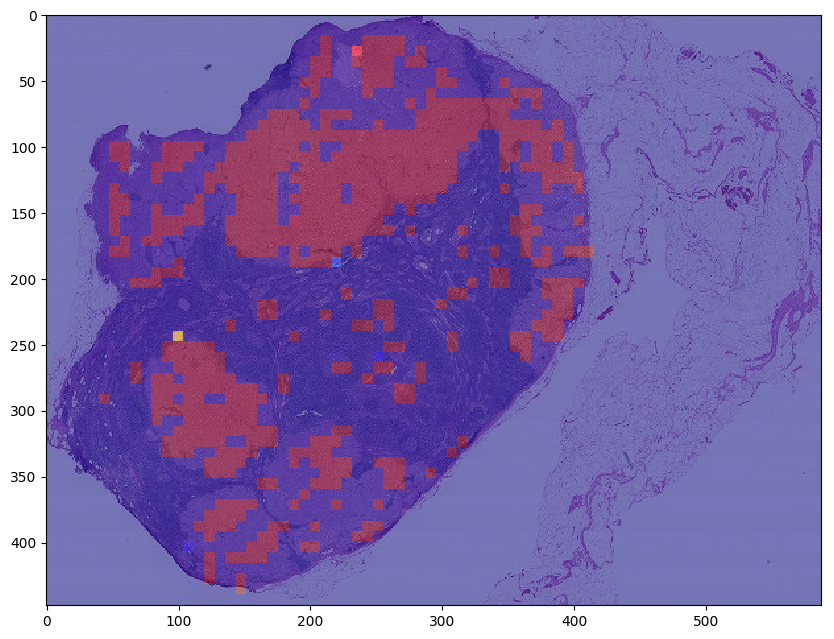

In [46]:
slide_path = os.path.join(total_path,'slides/tumor_%s.tif' %slide_id)

slide = open_slide(slide_path)
print("Read WSI from %s includes %d levels" %(slide_path,len(slide.level_dimensions)))
slide_image = read_slide(slide, 
                       x=int(slide.level_dimensions[7][0]*0.1)*down_factor[7], 
                       y=int(slide.level_dimensions[7][1]*0.1)*down_factor[7], 
                       level=7, 
                       width=int(slide.level_dimensions[7][0]*0.8), 
                       height=int(slide.level_dimensions[7][1]*0.8))

fig = plt.figure(figsize=(10,10), dpi=100)
tmp = plt.imshow(slide_image)
plt.imshow(pred34_resize, cmap='jet', alpha=0.5) 


### 3.2.2 ROC from Multi Scale Model

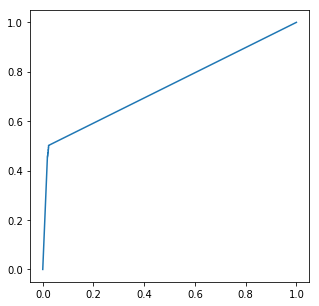

In [22]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test_label.flatten(),pred_34.flatten())
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)

In [47]:
metrics.roc_auc_score(test_label.flatten(),pred_34.flatten())

0.74005664619267